In [1]:
import numpy as np
from sklearn.datasets import load_sample_image

china = load_sample_image("china.jpg")
flower = load_sample_image("flower.jpg")
dataset = np.array([china, flower], dtype=np.float32)
# tf.nn.conv2d request input shape as `[batch, in_height, in_width, in_channels]`, let keep that way
batch_size, height, width, channels= dataset.shape
dataset.shape

(2, 427, 640, 3)

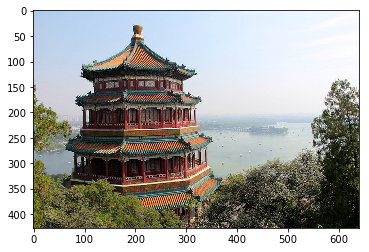

In [4]:
from matplotlib.pyplot import imshow
%matplotlib inline

imshow(china)

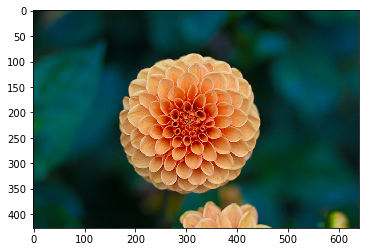

In [30]:
imshow(flower)

In [44]:
# 7 * 7 convoluation kernel tf.nn.conv2d require filter shape as `[filter_height, filter_width, in_channels, out_channels]`
filters = np.zeros(shape=(7, 7, channels, 2), dtype=np.float32) 
filters

array([[[[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]]],


       [[[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]]],


       [[[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],


In [45]:
filters[:, 3, :, 0] = 1
filters[3, :, :, 1] = 1
filters

array([[[[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]]],


       [[[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 1.,  0.],
         [ 1.,  0.],
         [ 1.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]]],


       [[[ 0.,  0.],
         [ 0.,  0.],
         [ 0.,  0.]],

        [[ 0.,  0.],


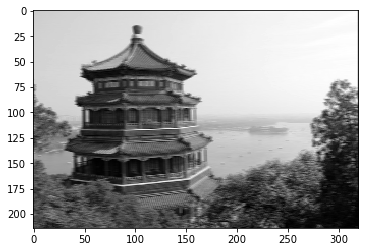

In [48]:
import tensorflow as tf

X = tf.placeholder(tf.float32, shape=(batch_size, height, width, channels))
convolution = tf.nn.conv2d(X, filters, strides=[1,2,2,1], padding="SAME")

with tf.Session() as sess:
    output = sess.run(convolution, feed_dict={X: dataset})

imshow(output[0, :, :, 1], cmap="gray")

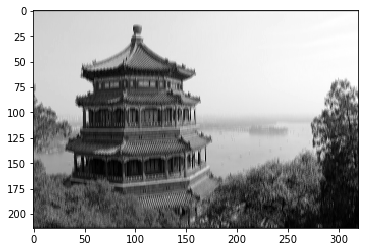

In [54]:
imshow(output[0, :, :, 0], cmap="gray")

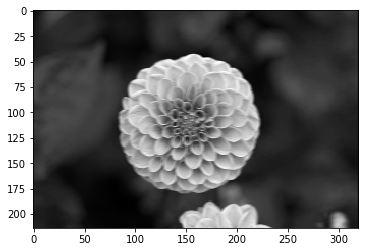

In [53]:
imshow(output[1, :, :, 1], cmap="gray")

In [60]:
X_pool = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,2,2,1], strides=[1,2,2,1], padding="VALID")

with tf.Session() as sess:
    output_pool = sess.run(max_pool, feed_dict={X: dataset})



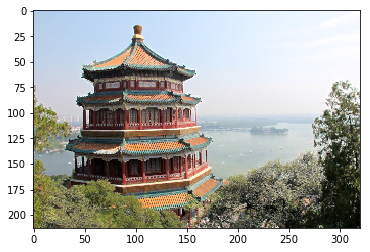

In [62]:
imshow(output_pool[0].astype(np.uint8))